In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

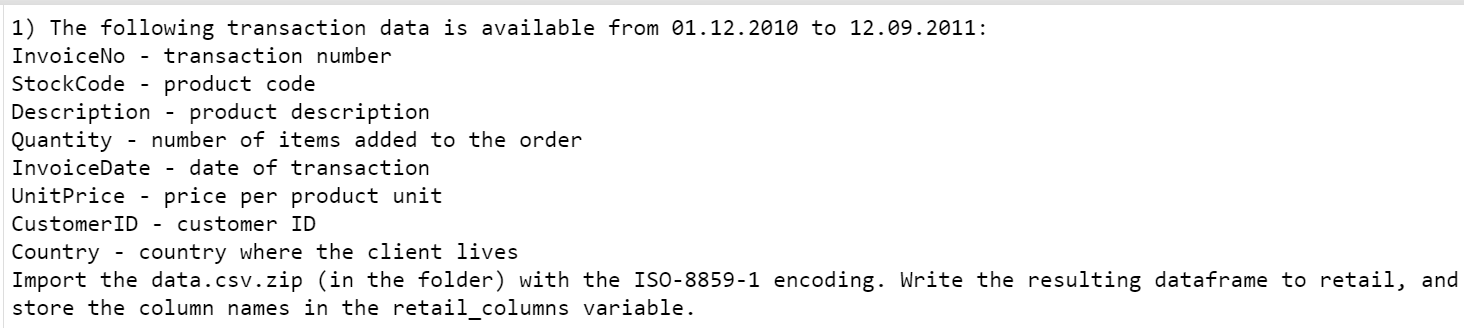

In [13]:
retail = pd.read_csv("C:/Users/stask/Analitics_Karpov/Module5/Lesson/data.csv.zip", encoding='ISO-8859-1', parse_dates=['InvoiceDate'])
retail.head(1)
# retail.dtypes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom


In [6]:
retail_columns = retail.columns
retail_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

2) Check if there are any repeated observations in the data, and give the number as the answer. If there are, remove them from retail.

In [16]:
retail.shape

(541909, 8)

In [21]:
retail.drop_duplicates(inplace=True)
retail.shape

(536641, 8)

3) ⭐️ Task with an asterisk!⭐️
The data contains records of both successful and cancelled transactions. If the user has cancelled the order, the transaction number (InvoiceNo) will start with a C (canceled). 
How many orders in total have the users cancelled?


In [39]:
retail[retail['InvoiceNo'].str[0] == 'C'].shape[0]

9251

In [41]:
retail[retail['InvoiceNo'].str.startswith("C")].shape[0]

9251

4) Now filter the data and leave in retail only those orders where Quantity > 0. As an answer, give the number of rows remaining.

In [43]:
retail[retail.Quantity > 0].shape[0]

526054

5) 💀 Difficult task! 💀
Count the number of orders for each user (CustomerID) from Germany. Leave only those who made more than N transactions (InvoiceNo), where N is 80% percentile. Write received user id to germany_top (not whole dataframe, only id). The order id is InvoiceNo. For each order more than 1 line can occur in the data.

In [73]:
german_buyers = retail[retail.Country == 'Germany'] \
    .groupby('CustomerID', as_index=False) \
    .agg({'InvoiceNo':pd.Series.nunique})
german_buyers.head(2)

,CustomerID,InvoiceNo
0,12426.0,1
1,12427.0,5


In [74]:
percentile_80 = german_buyers.InvoiceNo.quantile(0.8)
percentile_80

9.0

In [77]:
german_top = german_buyers[german_buyers.InvoiceNo > percentile_80].CustomerID
german_top.head()

3     12471.0
4     12472.0
6     12474.0
8     12476.0
12    12481.0
Name: CustomerID, dtype: float64

6) ⭐️ Task with asterisk!⭐️
Using the user id object (germany_top) obtained in the previous step, filter the observations and leave the data records only for the users we are interested in. Write the resulting dataframe to top_retail_germany.

In [83]:
top_retail_germany = retail[retail.CustomerID.isin(german_top)]
top_retail_germany.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


7) Group top_retail_germany by product code (StockCode). Which of the products was added to the shopping cart most often, apart from POST? 
Note: one order counts as a single purchase of any quantity of an item, i.e. without Quantity.

In [86]:
top_retail_germany.groupby('StockCode', as_index=False) \
    .agg({'Quantity':'count'}) \
    .query('StockCode != "POST"') \
    .sort_values('Quantity', ascending=False)

,StockCode,Quantity
409,22326,62
452,22423,55
411,22328,45
474,22467,37
316,22077,34
...,...,...
359,22181,1
336,22128,1
139,21257,1
141,21259,1


8) Let's go back to analyzing the complete retail dataset. Create Revenue column with purchase amount using Quantity and UnitPrice columns.

In [88]:
retail['Revenue'] = retail.Quantity * retail.UnitPrice
# retail.assign(Revenue =  retail.Quantity * retail.UnitPrice,
# ......
# ......
# )
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


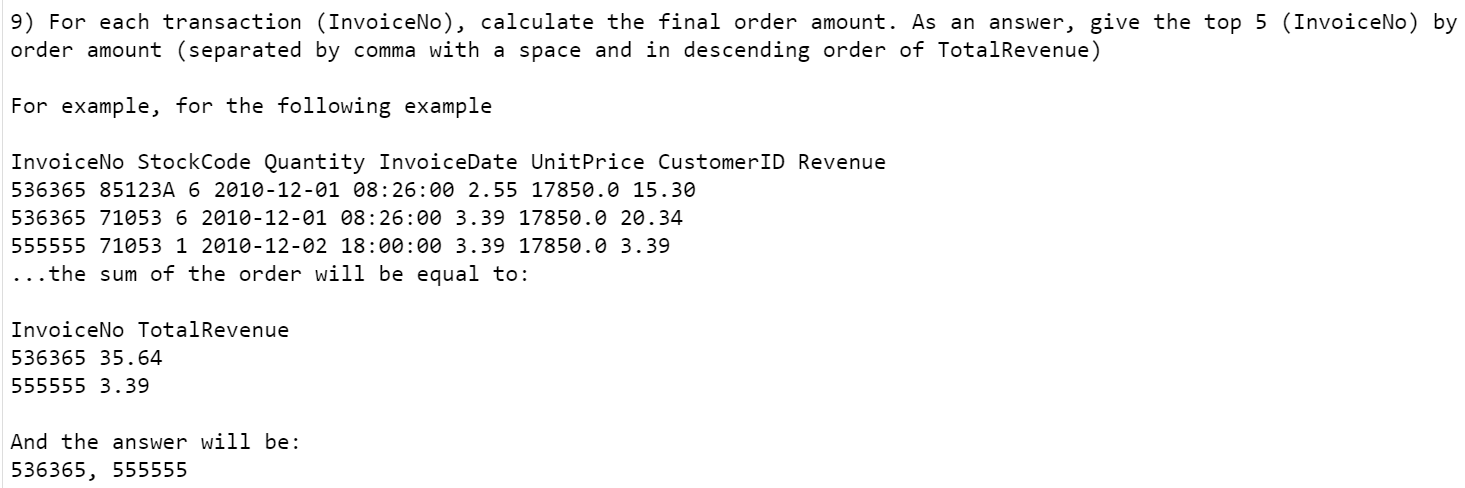

In [99]:
invoice_top5 = retail.groupby('InvoiceNo',as_index=False) \
    .agg({'Revenue':'sum'}).rename(columns={'Revenue':'TotalRevenue'}) \
    .sort_values('TotalRevenue', ascending=False).head(5)
print(invoice_top5.InvoiceNo.str.cat(sep=', '))

581483, 541431, 574941, 576365, 556444
